In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!cp '/content/drive/MyDrive/colab_datasests/ck/raw-img_four.zip' raw-img_four.zip

cp: cannot stat '/content/drive/MyDrive/colab_datasests/ck/raw-img_four.zip': No such file or directory


In [ ]:
!unzip raw-img_four.zip

unzip:  cannot find or open raw-img_four.zip, raw-img_four.zip.zip or raw-img_four.zip.ZIP.


In [ ]:
!ls

drive  sample_data


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-02 19:35:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-02 19:35:35 (96.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import walk_through_dir
data_path = '/content/raw-img_four'
walk_through_dir(data_path)

There are 5 directories and 0 images in '/content/raw-img_four'.
There are 0 directories and 385 images in '/content/raw-img_four/scoiattolo'.
There are 0 directories and 312 images in '/content/raw-img_four/elefante'.
There are 0 directories and 385 images in '/content/raw-img_four/pecora'.
There are 0 directories and 348 images in '/content/raw-img_four/farfalla'.
There are 0 directories and 401 images in '/content/raw-img_four/gatto'.


In [ ]:
from pathlib import Path
import os.path
import pandas as pd

In [ ]:
def convert_path_to_df(dataset):
    image_dir = Path(dataset)

    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg'))\
    + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.PNG'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    image_df = pd.concat([filepaths, labels], axis=1)

    return image_df

image_df = convert_path_to_df(data_path)

In [ ]:
image_df

,Filepath,Label
0,/content/raw-img_four/gatto/ea35b6082af2023ed1...,gatto
1,/content/raw-img_four/gatto/ea37b90f2df0033ed1...,gatto
2,/content/raw-img_four/gatto/ea37b80728f1003ed1...,gatto
3,/content/raw-img_four/gatto/ea36b40f2ef5013ed1...,gatto
4,/content/raw-img_four/gatto/ea36b20a2ef5083ed1...,gatto
...,...,...
1826,/content/raw-img_four/farfalla/OIP-XAmmbfpVnfb...,farfalla
1827,/content/raw-img_four/farfalla/OIP-ZPwLGck6a6r...,farfalla
1828,/content/raw-img_four/farfalla/OIP-v1xpGY2lNS4...,farfalla
1829,/content/raw-img_four/farfalla/OIP-wmDPGUE_hDy...,farfalla


In [ ]:
print('Всего изображений в наборе данных: ', len(image_df['Label']))

Всего изображений в наборе данных:  1831


In [ ]:
print('Класс\tКол-во изображений\n')
label_counts = image_df['Label'].value_counts()
label_counts

Класс	Кол-во изображений



gatto         401
scoiattolo    385
pecora        385
farfalla      348
elefante      312
Name: Label, dtype: int64

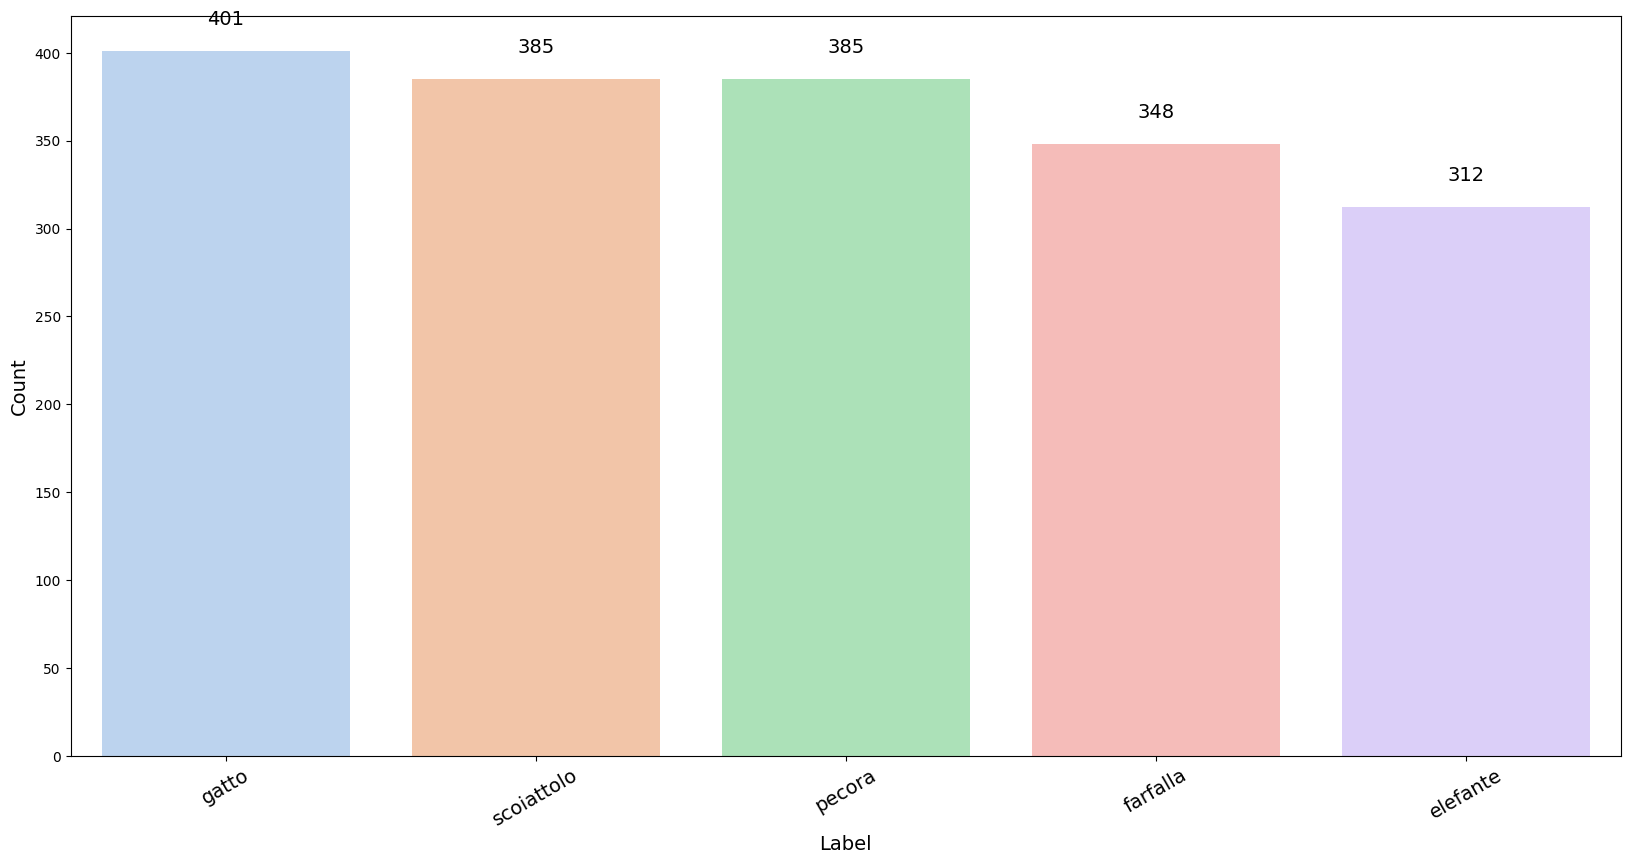

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='pastel', ax=axes)

axes.set_xlabel('Label', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_xticklabels(label_counts.index, rotation=30, fontsize=14)

for i, count in enumerate(label_counts.values):
    axes.text(i, count + 15, str(count), ha='center', fontsize=14)

fig.subplots_adjust(top=0.85)
plt.show()

In [ ]:
def example_img_show(index_list):
    fig, axes = plt.subplots(nrows=2,
                             ncols=3,
                             figsize=(10, 5))

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(image_df.Filepath[index_list[i]]))
        ax.set_title(image_df.Label[index_list[i]])
        if i == 5:
            ax.set_visible(False)

    plt.tight_layout()
    plt.show()

In [ ]:
tmp = ''
lenimg = len(image_df['Label'])
img_index_classes = {}

for i in range(lenimg):
    if tmp == image_df['Label'][i]:
        continue
    else:
        tmp = image_df['Label'][i]
        print(i, '\t', image_df['Label'][i])

        if image_df['Label'][i] not in img_index_classes:
            img_index_classes[image_df['Label'][i]] = i
print()
img_index_classes

0 	 gatto
400 	 scoiattolo
785 	 elefante
1097 	 pecora
1482 	 farfalla
1830 	 gatto



{'gatto': 0,
 'scoiattolo': 400,
 'elefante': 785,
 'pecora': 1097,
 'farfalla': 1482}

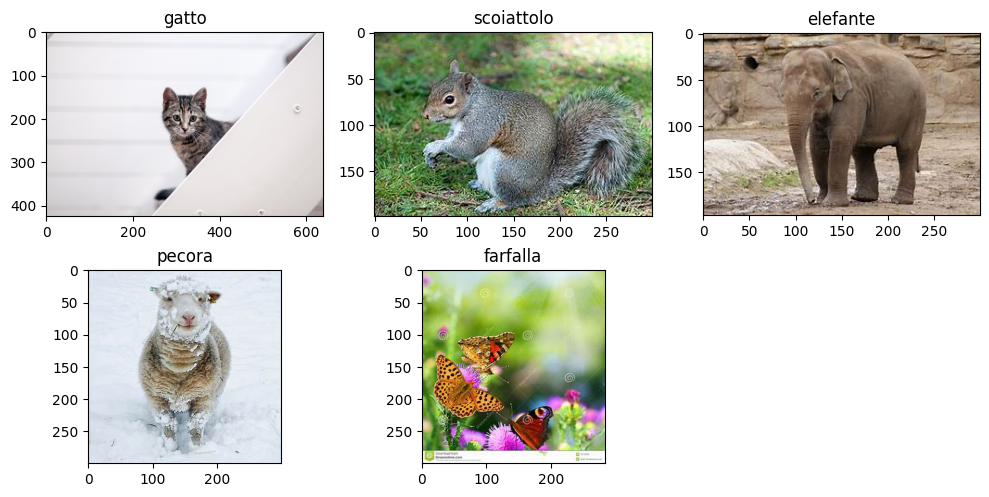

In [ ]:
index_img = list(img_index_classes.values())
index_img.append(0)

example_img_show(index_img)

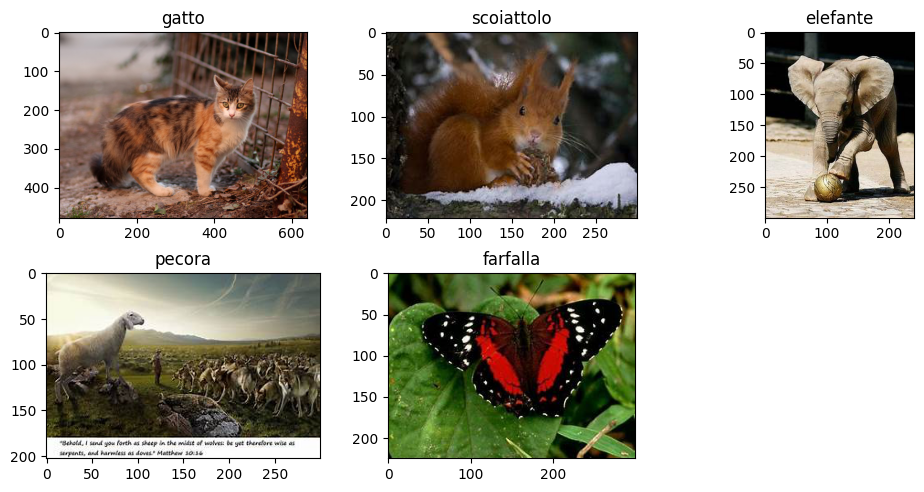

In [ ]:
new_img_index = [i+1 for i in index_img]
example_img_show(new_img_index)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
BATCH_SIZE = 60
IMG_SHAPE = (224, 224)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(validation_split=0.2,
                                     rotation_range=30,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=[0.8, 1.2])

test_generator = ImageDataGenerator()

In [ ]:
train_img = train_generator.flow_from_dataframe(dataframe=train_df,
                                                x_col='Filepath',
                                                y_col='Label',
                                                target_size=IMG_SHAPE,
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=BATCH_SIZE,
                                                shuffle=True,
                                                subset='training')

val_img = train_generator.flow_from_dataframe(dataframe=train_df,
                                                x_col='Filepath',
                                                y_col='Label',
                                                target_size=IMG_SHAPE,
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=BATCH_SIZE,
                                                shuffle=True,
                                                subset='validation')

test_img = test_generator.flow_from_dataframe(dataframe=test_df,
                                              x_col='Filepath',
                                              y_col='Label',
                                              target_size=IMG_SHAPE,
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=BATCH_SIZE,
                                              shuffle=False)

Found 1172 validated image filenames belonging to 5 classes.
Found 292 validated image filenames belonging to 5 classes.
Found 367 validated image filenames belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

pretrained_model = ResNet50(input_shape=(224, 224, 3),
                            include_top=False,
                            weights='imagenet',
                            pooling='max')

pretrained_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
from keras.optimizers.legacy.adam import Adam
from tensorflow.keras import layers
from tensorflow.keras import Model

# Создаем последовательность преобразований
augment = Sequential([layers.experimental.preprocessing.Resizing(224,224),
                      layers.experimental.preprocessing.Rescaling(1./255),
                      layers.experimental.preprocessing.RandomFlip("horizontal"),
                      layers.experimental.preprocessing.RandomRotation(0.1),
                      layers.experimental.preprocessing.RandomZoom(0.1),
                      layers.experimental.preprocessing.RandomContrast(0.1)])

inputs = pretrained_model.input
x = augment(inputs)

x = Dense(128, activation='relu')(pretrained_model.output)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)

outputs = Dense(5, activation='softmax')(x)

model_ResNet50 = Model(inputs=inputs, outputs=outputs)

model_ResNet50.compile(optimizer=Adam(0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history_ResNet50 = model_ResNet50.fit(train_img,
                                      steps_per_epoch=len(train_img),
                                      validation_data=val_img,
                                      validation_steps=len(val_img),
                                      epochs = 50)

Epoch 1/50
10/10 [==============================] - 41s 3s/step - loss: 2.5422 - accuracy: 0.2201 - val_loss: 3.3696 - val_accuracy: 0.1815
Epoch 2/50
10/10 [==============================] - 30s 3s/step - loss: 2.4205 - accuracy: 0.2602 - val_loss: 2.7664 - val_accuracy: 0.2123
Epoch 3/50
10/10 [==============================] - 31s 3s/step - loss: 2.3880 - accuracy: 0.2415 - val_loss: 2.3276 - val_accuracy: 0.2534
Epoch 4/50
10/10 [==============================] - 30s 3s/step - loss: 2.2630 - accuracy: 0.2730 - val_loss: 2.1465 - val_accuracy: 0.2432
Epoch 5/50
10/10 [==============================] - 30s 3s/step - loss: 2.2082 - accuracy: 0.2824 - val_loss: 1.8681 - val_accuracy: 0.2808
Epoch 6/50
10/10 [==============================] - 31s 3s/step - loss: 2.2197 - accuracy: 0.2756 - val_loss: 1.7393 - val_accuracy: 0.3185
Epoch 7/50
10/10 [==============================] - 32s 3s/step - loss: 2.0844 - accuracy: 0.3157 - val_loss: 1.6488 - val_accuracy: 0.3425
Epoch 8/50
10/10 [==

In [ ]:
def accuracy_loss_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylim(0)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylim(0)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:

def plot_test_img(model):
    random_index = np.random.randint(0, len(test_df) - 1, 15)

    fig, axes = plt.subplots(nrows=3,
                             ncols=5,
                             figsize=(15,10),
                             subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
        if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
            color = 'green'
        else:
            color = 'red'
        ax.set_title(f'True: {test_df.Label.iloc[random_index[i]]}\nPred: {pred[random_index[i]]}', color = color)

    plt.show()
    plt.tight_layout()

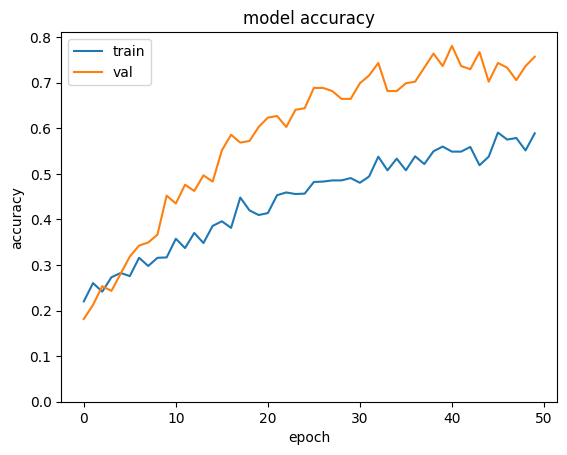

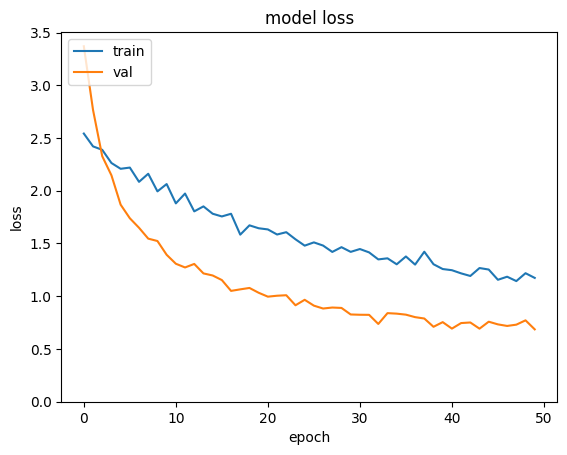

In [ ]:
accuracy_loss_plot(history_ResNet50)

In [ ]:
results = model_ResNet50.evaluate(test_img, verbose=0)
print('Test loss: ', results[0],
      '\nTest accuracy: ', results[1]*100, ' %')

Test loss:  0.5684028267860413 
Test accuracy:  79.29155230522156  %


In [ ]:
import numpy as np

pred = model_ResNet50.predict(test_img)
pred = np.argmax(pred, axis=1)

labels = (train_img.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred = [labels[k] for k in pred]

print('Первые 5 предсказанных: ', pred[:5])

3/3 [==============================] - 4s 1s/step
Первые 5 предсказанных:  ['gatto', 'pecora', 'farfalla', 'pecora', 'pecora']


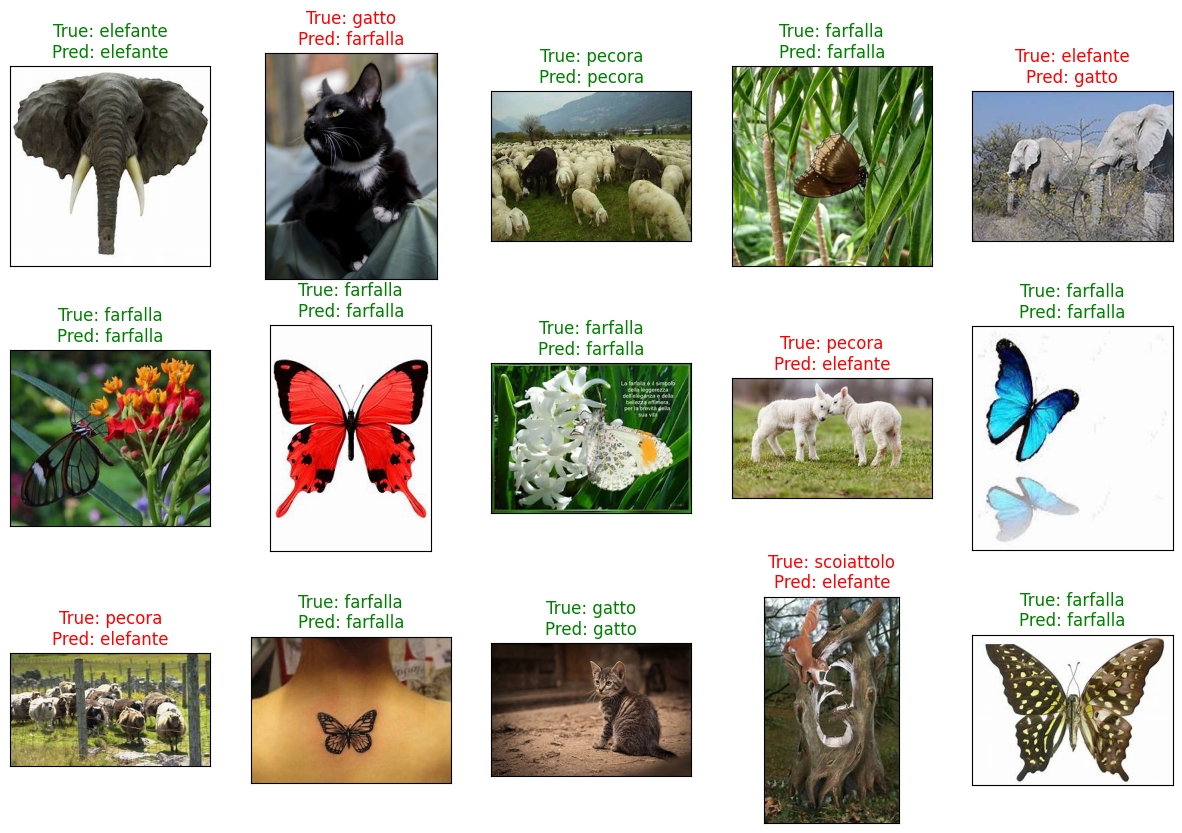

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_test_img(model_ResNet50)

In [ ]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    elefante       0.72      0.85      0.78        54
    farfalla       0.91      0.96      0.93        73
       gatto       0.71      0.81      0.75        78
      pecora       0.86      0.83      0.84        88
  scoiattolo       0.75      0.53      0.62        74

    accuracy                           0.79       367
   macro avg       0.79      0.80      0.79       367
weighted avg       0.79      0.79      0.79       367

